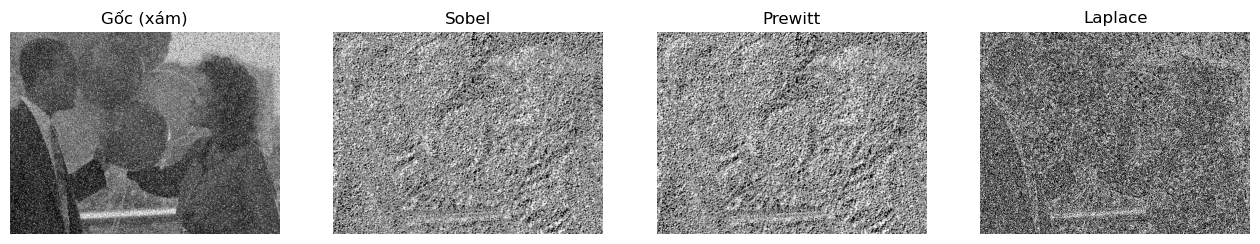

In [11]:
import numpy as np
import imageio.v2 as iio
import os
from glob import glob
from scipy.ndimage import median_filter, sobel, prewitt, laplace
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục chứa ảnh
folder = './exercise'  # Đổi lại nếu cần

# Lấy danh sách các file ảnh (jpg, png)
image_files = glob(os.path.join(folder, '*.jpg')) + glob(os.path.join(folder, '*.png'))

# Tạo thư mục lưu kết quả nếu chưa có
output_folder = './exercise_edges'
os.makedirs(output_folder, exist_ok=True)

for file in image_files:
    img = iio.imread(file)
    # Nếu ảnh màu, chuyển sang ảnh xám
    if img.ndim == 3:
        img_gray = np.dot(img[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)
    else:
        img_gray = img

    # Khử nhiễu bằng median filter
    denoised = median_filter(img_gray, size=3)

    # Xác định biên bằng Sobel
    sobel_x = sobel(denoised, axis=0)
    sobel_y = sobel(denoised, axis=1)
    sobel_edge = np.hypot(sobel_x, sobel_y)
    sobel_edge = (sobel_edge / sobel_edge.max() * 255).astype(np.uint8)
    iio.imwrite(os.path.join(output_folder, os.path.splitext(os.path.basename(file))[0] + '_sobel.png'), sobel_edge)

    # Xác định biên bằng Prewitt
    prewitt_x = prewitt(denoised, axis=0)
    prewitt_y = prewitt(denoised, axis=1)
    prewitt_edge = np.hypot(prewitt_x, prewitt_y)
    prewitt_edge = (prewitt_edge / prewitt_edge.max() * 255).astype(np.uint8)
    iio.imwrite(os.path.join(output_folder, os.path.splitext(os.path.basename(file))[0] + '_prewitt.png'), prewitt_edge)

    # Xác định biên bằng Laplace
    laplace_edge = laplace(denoised)
    laplace_edge = np.abs(laplace_edge)
    laplace_edge = (laplace_edge / laplace_edge.max() * 255).astype(np.uint8)
    iio.imwrite(os.path.join(output_folder, os.path.splitext(os.path.basename(file))[0] + '_laplace.png'), laplace_edge)

    # Hiển thị kết quả
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    axs[0].imshow(img_gray, cmap='gray')
    axs[0].set_title('Gốc (xám)')
    axs[0].axis('off')
    axs[1].imshow(sobel_edge, cmap='gray')
    axs[1].set_title('Sobel')
    axs[1].axis('off')
    axs[2].imshow(prewitt_edge, cmap='gray')
    axs[2].set_title('Prewitt')
    axs[2].axis('off')
    axs[3].imshow(laplace_edge, cmap='gray')
    axs[3].set_title('Laplace')
    axs[3].axis('off')
    plt.show()